In [21]:
#Import of libraries and data preprocessing.
import tensorflow as tf
from keras.models import Model
from keras.layers import Dropout, Dense, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

df = pd.read_csv("./assets/risk_profiles.csv")
df.drop(["total_score"], axis=1, inplace=True)

m_data = np.array(df)

X = np.zeros((2000, 5))
Y = [0] * 2000
for i in range(2000):
    X[i] = m_data[i, :5] #this syntax for numPy shows [row, col]
    Y[i] = m_data[i, 5]

label_convert = LabelEncoder()
fitted_Y = label_convert.fit(Y)
converted_Y = label_convert.transform(Y)  

print("Class index mapping:")
for idx, label in enumerate(label_convert.classes_):
    print(f"{idx} → {label}")
    
Y = to_categorical(converted_Y).astype(float) 


Class index mapping:
0 → Aggressive
1 → Conservative
2 → Moderate


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4669 - loss: 1.1376 - val_accuracy: 0.3425 - val_loss: 1.8401
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7094 - loss: 0.6409 - val_accuracy: 0.3750 - val_loss: 1.5539
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7779 - loss: 0.5069 - val_accuracy: 0.5050 - val_loss: 1.0358
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8112 - loss: 0.4351 - val_accuracy: 0.6600 - val_loss: 0.6591
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8019 - loss: 0.4425 - val_accuracy: 0.7125 - val_loss: 0.5368
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8071 - loss: 0.4126 - val_accuracy: 0.8025 - val_loss: 0.3663
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.8328 - loss: 0.3791 - val_accuracy: 0.8800 - val_loss: 0.2770
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8398 - loss: 0.3535 - val_accura

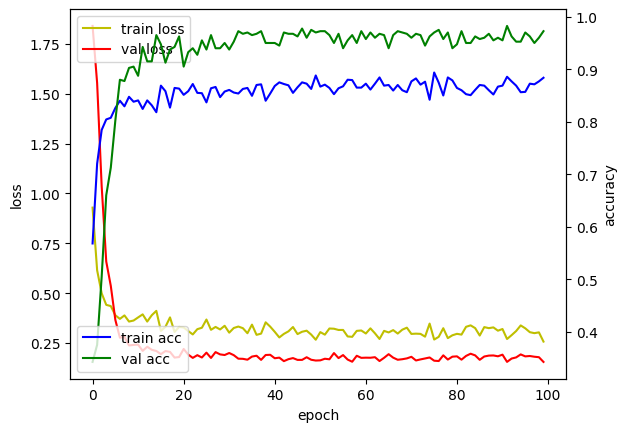

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
accuracy = 97.25%
              precision    recall  f1-score   support

  Aggressive       0.99      0.99      0.99       137
Conservative       0.96      0.96      0.96       110
    Moderate       0.97      0.96      0.96       153

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [22]:
#Custom Model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

custom_model = Sequential()
custom_model.add(Dense(32, activation='relu', input_dim = 5))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.2))
custom_model.add(Dense(64, activation='relu'))
custom_model.add(BatchNormalization())
custom_model.add(Dropout(0.2))
custom_model.add(Dense(32, activation='relu'))
custom_model.add(Dense(3, activation='softmax')) 

custom_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
record = custom_model.fit(X_train, Y_train, epochs=100, batch_size=20, validation_data=(X_test, Y_test))

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(record.history['loss'], 'y', label='train loss')
loss_ax.plot(record.history['val_loss'], 'r', label='val loss')

acc_ax.plot(record.history['accuracy'], 'b', label='train acc')
acc_ax.plot(record.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Predictions
custom_pred = np.argmax(custom_model.predict(X_test), axis=1)

# True labels
custom_labeled_result = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(custom_labeled_result, custom_pred)
print(f"accuracy = {accuracy * 100:.2f}%")

print(classification_report(custom_labeled_result, custom_pred, target_names=label_convert.classes_))


In [26]:
#Model from Scikit-Learn

sklearn_NN = MLPClassifier(
    hidden_layer_sizes=(64, 256, 64),
    batch_size=20,
    max_iter=100,
    random_state=None
)

sklearn_NN.fit(X_train, Y_train)
sklearn_NN_pred = sklearn_NN.predict(X_test)

accuracy = accuracy_score(Y_test, sklearn_NN_pred)
print(f"accuracy = {accuracy * 100:.2f}%")

print(classification_report(Y_test, sklearn_NN_pred, target_names=label_convert.classes_))


accuracy = 97.00%
              precision    recall  f1-score   support

  Aggressive       1.00      1.00      1.00       137
Conservative       0.95      0.96      0.95       110
    Moderate       0.96      0.98      0.97       153

   micro avg       0.97      0.98      0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.97      0.98      0.98       400
 samples avg       0.98      0.98      0.98       400



In [41]:
#Edge Cases

#Case 1: Custom, Expected Conservative
new_user_scaled = np.array([[1, 6.6, 6.6, 6.6, 1]])
prediction = custom_model.predict(new_user_scaled)
class_idx = np.argmax(prediction)
label = label_convert.inverse_transform([class_idx])[0]
print("Custom Case 1:", label)

#Case 1: Sklearn
prediction = sklearn_NN.predict(new_user_scaled)
label = label_convert.inverse_transform([class_idx])[0]
print("Sklearn Cast 1:", label)

#Case 2: Custom, Expected Aggressive
new_user_scaled = np.array([[6, 9.9, 9.9, 6.6, 5]])
prediction = custom_model.predict(new_user_scaled)
class_idx = np.argmax(prediction)
label = label_convert.inverse_transform([class_idx])[0]
print("Custom Case 2:", label)

#Case 2: Sklearn
prediction = sklearn_NN.predict(new_user_scaled)
label = label_convert.inverse_transform([class_idx])[0]
print("Sklearn Cast 2:", label)

#Case 3: Custom, Expected Moderate
new_user_scaled = np.array([[7, 6.6, 6.6, 6.6, 1]])
prediction = custom_model.predict(new_user_scaled)
class_idx = np.argmax(prediction)
label = label_convert.inverse_transform([class_idx])[0]
print("Custom Case 3:", label)

#Case 3: Sklearn
prediction = sklearn_NN.predict(new_user_scaled)
label = label_convert.inverse_transform([class_idx])[0]
print("Sklearn Cast 3:", label)

#Case 4: Custom, Expected Conservative
new_user_scaled = np.array([[3, 3.3, 6.6, 3.3, 9]])
prediction = custom_model.predict(new_user_scaled)
class_idx = np.argmax(prediction)
label = label_convert.inverse_transform([class_idx])[0]
print("Custom Case 4:", label)

#Case 4: Sklearn
prediction = sklearn_NN.predict(new_user_scaled)
label = label_convert.inverse_transform([class_idx])[0]
print("Sklearn Cast 4:", label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Custom Case 1: Conservative
Sklearn Cast 1: Conservative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Custom Case 2: Aggressive
Sklearn Cast 2: Aggressive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Custom Case 3: Moderate
Sklearn Cast 3: Moderate
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Custom Case 4: Conservative
Sklearn Cast 4: Conservative


In [ ]:


# Optional: print all class probabilities
for i, prob in enumerate(prediction[0]):
    print(f"{label_convert.classes_[i]}: {prob*100:.2f}%")


Predicted risk category: Conservative
Aggressive: 0.00%
Conservative: 100.00%
Moderate: 0.00%
